<a href="https://colab.research.google.com/github/PauloSanchez/Data_science_UL/blob/main/Proyecto_2_final_Paulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis exploratorio

In [25]:
#Importamos lubreria pandas para carga de datos.
import pandas as pd
import numpy as np

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Archivos ejercicios/Proyecto 2/Historico_DCIW_Resueltos.xlsx')
df.head()

,Número de documento,CC,Planta,Tipo,ID de escaneo,Fecha de escaneo,Fecha de Vencimiento,Fecha Doc.,Asignado a,Acción,...,Concepto,Conca,Generación,Motivo general,Sub-Motivo,Monto al P&L (CLP),Fecha Resolución,Mes,Año,Semana
0,155109.0,2247.0,0.0,INVPO,20210519_LXT8TSD360,05/19/2021,08/16/2021,05/18/2021,VANIA.BLANCO,Esperando la acción del Aprobador de GR (R400),...,HONORARIO AGENCIA,15510950535712.0,Caso Antiguo,No Planificado,No provisionado,31647.058824,2022-06-23,Junio,2022.0,25.0
1,155109.0,2247.0,0.0,INVPO,20210519_LXT8TSD360,05/19/2021,08/16/2021,05/18/2021,XIMENA.TEJO,Waiting GR Approver Action (R400),...,HONORARIO AGENCIA,15510950535712.0,Caso Devuelto,No Planificado,Cambio de PO (DE-PARA),31647.058824,2022-09-06,Septiembre,2022.0,36.0
2,82918.0,2247.0,0.0,INVPO,20210709_LSE6GAY973,07/09/2021,08/15/2021,05/17/2021,EQUIPO IBM,Waiting GR Approver Action (R400),...,HONORARIO AGENCIA,8291850535712.0,Caso Antiguo,No Planificado,KTOP,760479.831933,2022-09-09,Septiembre,2022.0,36.0
3,224496.0,2247.0,0.0,INVPO,20210727_LS9OB34430,07/27/2021,05/16/2021,05/16/2021,XIMENA.TEJO,Esperando la acción del Aprobador de GR (R400),...,"CONEXION, DESCONEXION CONT.REFRIG.",22449610123316.0,Caso Antiguo,Planificado con diferencia,Sub-provisión,0.000000,2022-09-01,Septiembre,2022.0,35.0
4,162544.0,2247.0,0.0,INVPO,20210927_LXEQO1Z858,09/27/2021,12/23/2021,09/24/2021,VANIA.BLANCO,Waiting GR Approver Action (R400),...,HONORARIO AGENCIA,16254450535712.0,Caso Antiguo,No Planificado,KTOP,108952.100840,2022-07-15,Julio,2022.0,28.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8058 entries, 0 to 8057
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Número de documento         8058 non-null   object        
 1   CC                          8058 non-null   float64       
 2   Planta                      8058 non-null   float64       
 3   Tipo                        8058 non-null   object        
 4   ID de escaneo               8058 non-null   object        
 5   Fecha de escaneo            8058 non-null   object        
 6   Fecha de Vencimiento        7563 non-null   object        
 7   Fecha Doc.                  7563 non-null   object        
 8   Asignado a                  8058 non-null   object        
 9   Acción                      7563 non-null   object        
 10  Razón                       8058 non-null   object        
 11  Fecha de estado             7563 non-null   object      

Se observan valores nulos o vacios en el dataframe, lñas columnas que no agregan valor al modelo se eliminarán y dejaremos solo aquellos que le sirven.

In [27]:
df = df.drop(columns=['RFC del proveedor','CC','Planta','Acción','Conca','Cant. Digito PO (10)','Área Responsable','Diferencias (TH 100 Euros)',
                      'Monto PO/Vendor MB5S','Monto PO/Vendor DCIW','Número de OC','PO TEXTO','Fecha de Vencimiento','Categoria','Numero de PO',
                      'Fecha de estado','Fecha Doc.','Fecha Documento','Fecha escaneo','Rango antigüedad','Generación'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8058 entries, 0 to 8057
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Número de documento   8058 non-null   object        
 1   Tipo                  8058 non-null   object        
 2   ID de escaneo         8058 non-null   object        
 3   Fecha de escaneo      8058 non-null   object        
 4   Asignado a            8058 non-null   object        
 5   Razón                 8058 non-null   object        
 6   Monto Total           8058 non-null   float64       
 7   Moneda                8058 non-null   object        
 8   No. del proveedor     8058 non-null   object        
 9   Nombre del proveedor  8058 non-null   object        
 10  Monto total Neto      8055 non-null   float64       
 11  Status                8057 non-null   object        
 12  Año Documento         8058 non-null   float64       
 13  Concepto          

Para el caso de la columna "Monto al P&L (CLP)" se rellenaran con cero los nulos, pues es altamente probable que ese sea el caso, de "Status" se reemplazarán por "Merge" y "Sub-motivo" se eliminarán las filas, pues es complejo entender a que sub-motivo corresponde.

In [28]:
df['Status'] = df['Status'].fillna("Merge")
df['Monto al P&L (CLP)'] = df['Monto al P&L (CLP)'].fillna("0")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8058 entries, 0 to 8057
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Número de documento   8058 non-null   object        
 1   Tipo                  8058 non-null   object        
 2   ID de escaneo         8058 non-null   object        
 3   Fecha de escaneo      8058 non-null   object        
 4   Asignado a            8058 non-null   object        
 5   Razón                 8058 non-null   object        
 6   Monto Total           8058 non-null   float64       
 7   Moneda                8058 non-null   object        
 8   No. del proveedor     8058 non-null   object        
 9   Nombre del proveedor  8058 non-null   object        
 10  Monto total Neto      8055 non-null   float64       
 11  Status                8058 non-null   object        
 12  Año Documento         8058 non-null   float64       
 13  Concepto          

Los NAN que van quedando se eliminarán considerando que son máx 4 filas.

In [29]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8054 entries, 0 to 8057
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Número de documento   8054 non-null   object        
 1   Tipo                  8054 non-null   object        
 2   ID de escaneo         8054 non-null   object        
 3   Fecha de escaneo      8054 non-null   object        
 4   Asignado a            8054 non-null   object        
 5   Razón                 8054 non-null   object        
 6   Monto Total           8054 non-null   float64       
 7   Moneda                8054 non-null   object        
 8   No. del proveedor     8054 non-null   object        
 9   Nombre del proveedor  8054 non-null   object        
 10  Monto total Neto      8054 non-null   float64       
 11  Status                8054 non-null   object        
 12  Año Documento         8054 non-null   float64       
 13  Concepto          

Observamos que los datos ya se encuentran ok,solo resta ajustar el tipo de dato de cada columna al correcto.

In [30]:
#Renombrar columnas
df.columns=['Número_de_documento','Tipo','ID_de_escaneo','Fecha_de_escaneo','Asignado_a','Razón','Monto_Total',
            'Moneda', 'ID_del_proveedor', 'Nombre_del_proveedor', 'Monto_total_Neto', 'Status', 'Año_Documento',
            'Concepto', 'Motivo_general', 'Sub-Motivo', 'Monto_al_P&L', 'Fecha_Resolución',
            'Mes', 'Año', 'Semana']

#Reemplazar datos para homogeneidad.

df.loc[df.Motivo_general=='no planificado','Motivo_general']='No Planificado'
df.loc[df.Motivo_general=='planificado','Motivo_general']='Planificado'

#Graficando surgió la necesidad de este codigo.
df.loc[df.Mes=='Mayo','Mes']='5'
df.loc[df.Mes=='Junio','Mes']='6'
df.loc[df.Mes=='Julio','Mes']='7'
df.loc[df.Mes=='Agosto','Mes']='8'
df.loc[df.Mes=='Septiembre','Mes']='9'
df.loc[df.Mes=='Octubre','Mes']='10'


Al intentar crear graficos detecté que habian datos con minusculas y otros mayusculas, asi que renombraré las columnas que tenian espacios, para realizar el cambio de los datos a un mismo caracter.

In [31]:

#Una vez realizado el reemplazo, debemos dar formato a las columnas afectadas y aquellas float.

df['Año_Documento'] = df['Año_Documento'].astype(int)
df['Monto_al_P&L'] = df['Monto_al_P&L'].astype(float)
df['Año'] = df['Año'].astype(int)
df['Semana'] = df['Semana'].astype(int)
df['Mes'] = df['Mes'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8054 entries, 0 to 8057
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Número_de_documento   8054 non-null   object        
 1   Tipo                  8054 non-null   object        
 2   ID_de_escaneo         8054 non-null   object        
 3   Fecha_de_escaneo      8054 non-null   object        
 4   Asignado_a            8054 non-null   object        
 5   Razón                 8054 non-null   object        
 6   Monto_Total           8054 non-null   float64       
 7   Moneda                8054 non-null   object        
 8   ID_del_proveedor      8054 non-null   object        
 9   Nombre_del_proveedor  8054 non-null   object        
 10  Monto_total_Neto      8054 non-null   float64       
 11  Status                8054 non-null   object        
 12  Año_Documento         8054 non-null   int64         
 13  Concepto          

#Visualizaciones

In [32]:
#Importamos libreria de visualizaciones
import matplotlib.pyplot as plt

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8054 entries, 0 to 8057
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Número_de_documento   8054 non-null   object        
 1   Tipo                  8054 non-null   object        
 2   ID_de_escaneo         8054 non-null   object        
 3   Fecha_de_escaneo      8054 non-null   object        
 4   Asignado_a            8054 non-null   object        
 5   Razón                 8054 non-null   object        
 6   Monto_Total           8054 non-null   float64       
 7   Moneda                8054 non-null   object        
 8   ID_del_proveedor      8054 non-null   object        
 9   Nombre_del_proveedor  8054 non-null   object        
 10  Monto_total_Neto      8054 non-null   float64       
 11  Status                8054 non-null   object        
 12  Año_Documento         8054 non-null   int64         
 13  Concepto          

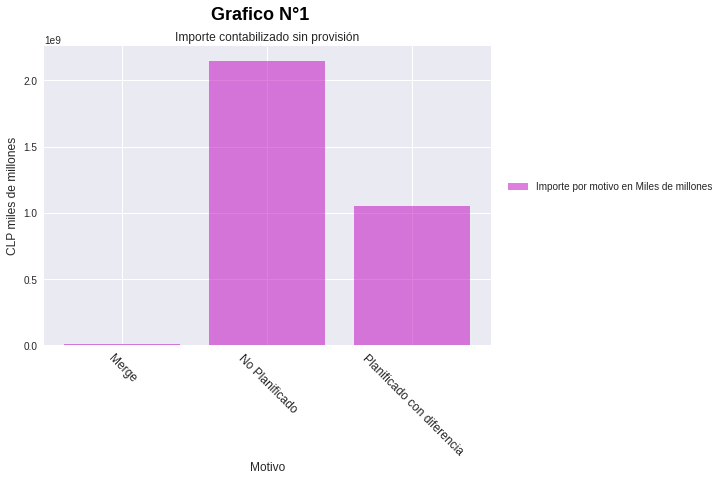

In [34]:
#Graficamos

filtro1 = df['Monto_al_P&L'] > 0
df1=df.loc[filtro1, :] #Creamos un nuevo dataframe con el filtro.
data1=df1.groupby(['Motivo_general'])['Monto_al_P&L'].sum()
x=np.array(data1.index)
y=np.array(data1.values)

#Graficamos
plt.style.use('seaborn')
plt.suptitle('Grafico N°1', fontsize=18,fontweight="bold", c="k")
plt.title('Importe contabilizado sin provisión', fontsize=12)
plt.bar(x,y, color="m", alpha=0.5)
plt.xlabel('Motivo', fontsize=12)
plt.ylabel('CLP miles de millones', fontsize=12)
plt.xticks(size=12, rotation = -45)
plt.legend(['Importe por motivo en Miles de millones'],loc=(1.03,0.5))

El grafico muestra el dinero que se contabilizó sin tener una provisión e impactó directamente los resultados financieros.

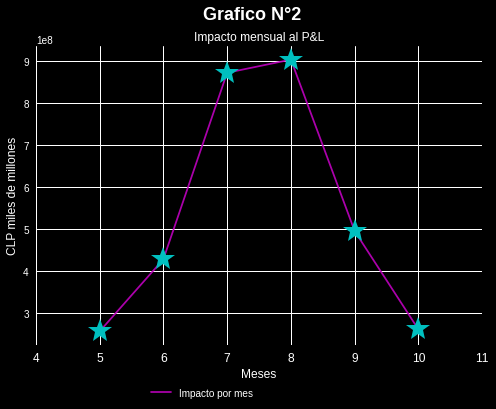

In [35]:

#Graficamos
data2=df1.groupby(['Mes'])['Monto_al_P&L'].sum()
x1=np.array(data2.index)
y1=np.array(data2.values)

#Graficamos
plt.style.use('dark_background')
plt.suptitle('Grafico N°2', fontsize=18,fontweight="bold", c="w")
plt.title('Impacto mensual al P&L', fontsize=12)
plt.plot(x1, y1, "m-",markersize = 25, alpha=0.9)
plt.plot(x1, y1, "c*",markersize = 25)
plt.xlabel('Meses', fontsize=12)
plt.ylabel('CLP miles de millones', fontsize=12)
plt.xticks(size=12)

plt.xlim(4,11)
plt.legend(['Impacto por mes'],loc=(0.25,-0.19))

Se visualiza el impacto a los resultados financiero por cada mes del año 2022 en miles de millones de pesos chilenos.

Text(0, 0.5, 'CLP miles de millones')

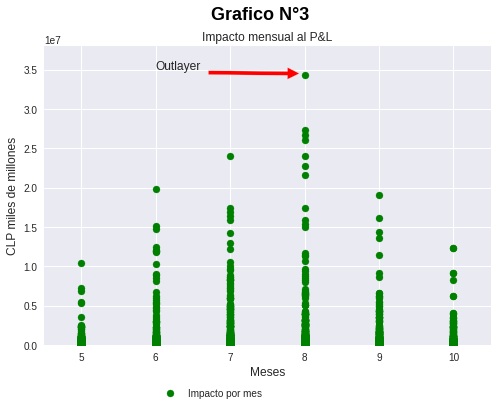

In [36]:
#Graficamos
data3=df1.groupby(['Mes'])['Monto_al_P&L'].sum()
x2=np.array(data3.index)
y2=np.array(data3.values)


plt.style.use('seaborn')
plt.suptitle('Grafico N°3', fontsize=18,fontweight="bold", c="k")
plt.title('Impacto mensual al P&L', fontsize=12)
plt.scatter(df1['Mes'],df1['Monto_al_P&L'], color="g")
plt.annotate('Outlayer',fontsize=12, xy=(8,34500000), xytext=(6,35000000), arrowprops=dict(facecolor='red', shrink=0.05))
plt.xlim(4.5,10.5)
plt.ylim(0,38000000)
plt.legend(['Impacto por mes'],loc=(0.25,-0.19))
plt.xlabel('Meses', fontsize=12)
plt.ylabel('CLP miles de millones', fontsize=12)

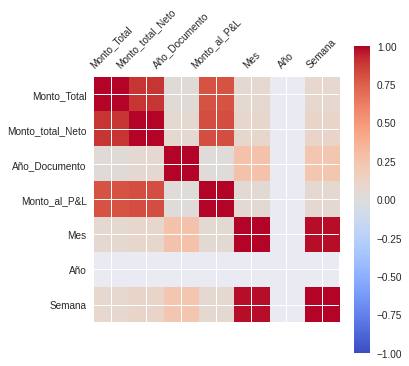

In [37]:
matriz = df1.corr()

plt.matshow(matriz,cmap='coolwarm',vmin=-1, vmax=1)
plt.xticks(range(7), matriz.columns,rotation=45)
plt.yticks(range(7), matriz.columns)
plt.colorbar()

Al ver el grafico de correlación se ven pocas columnas pero se debe a que hay variables categoricas que debemos transformar.

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6977 entries, 0 to 8057
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Número_de_documento   6977 non-null   object        
 1   Tipo                  6977 non-null   object        
 2   ID_de_escaneo         6977 non-null   object        
 3   Fecha_de_escaneo      6977 non-null   object        
 4   Asignado_a            6977 non-null   object        
 5   Razón                 6977 non-null   object        
 6   Monto_Total           6977 non-null   float64       
 7   Moneda                6977 non-null   object        
 8   ID_del_proveedor      6977 non-null   object        
 9   Nombre_del_proveedor  6977 non-null   object        
 10  Monto_total_Neto      6977 non-null   float64       
 11  Status                6977 non-null   object        
 12  Año_Documento         6977 non-null   int64         
 13  Concepto          

In [39]:
#Variables categoricas

df1['Motivo_general'] = pd.factorize(df1['Motivo_general'])[0]
df1['Sub-Motivo'] = pd.factorize(df1['Sub-Motivo'])[0]
df1['Status'] = pd.factorize(df1['Status'])[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

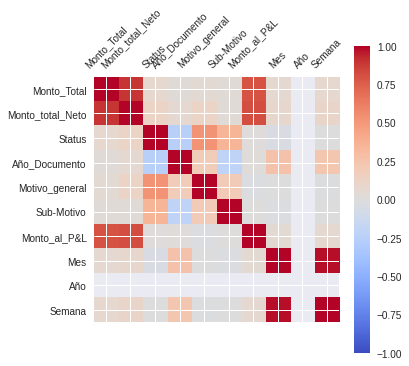

In [40]:
matriz = df1.corr()

plt.matshow(matriz,cmap='coolwarm',vmin=-1, vmax=1)
plt.xticks(range(10), matriz.columns,rotation=45)
plt.yticks(range(10), matriz.columns)
plt.colorbar()

In [41]:
df1.corr()

,Monto_Total,Monto_total_Neto,Status,Año_Documento,Motivo_general,Sub-Motivo,Monto_al_P&L,Mes,Año,Semana
Monto_Total,1.000000,0.892736,0.072770,0.023763,0.050861,0.029988,0.799481,0.060509,NaN,0.071031
Monto_total_Neto,0.892736,1.000000,0.117349,0.060228,0.117797,0.030642,0.816876,0.090148,NaN,0.103364
Status,0.072770,0.117349,1.000000,-0.246833,0.525183,0.348048,0.014868,-0.032330,NaN,-0.002282
Año_Documento,0.023763,0.060228,-0.246833,1.000000,0.183584,-0.208354,0.021934,0.258455,NaN,0.226898
Motivo_general,0.050861,0.117797,0.525183,0.183584,1.000000,0.189071,-0.016406,-0.005594,NaN,-0.013497
Sub-Motivo,0.029988,0.030642,0.348048,-0.208354,0.189071,1.000000,0.006190,-0.022112,NaN,-0.005866
Monto_al_P&L,0.799481,0.816876,0.014868,0.021934,-0.016406,0.006190,1.000000,0.049117,NaN,0.063979
Mes,0.060509,0.090148,-0.032330,0.258455,-0.005594,-0.022112,0.049117,1.000000,NaN,0.980853
Año,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Semana,0.071031,0.103364,-0.002282,0.226898,-0.013497,-0.005866,0.063979,0.980853,NaN,1.000000


Al mirar los numeros en la tabla de correlaciones, no  se representan en el grafico o mapa de calor, con esto puedo considerar tomar como variables dependientes aquellas que tengan un valor de correlación con la variable independiente (Monto_al_P&L) por sobre 0.20 o -0.20...

#Modelos de regresión y benchmarking

##Preprosesamiento de datos

In [42]:
#Definir variables dependiente e independiente.

X0 = df1[['Monto_total_Neto','Status', 'Año_Documento', 'Motivo_general', 'Sub-Motivo', 'Mes', 'Semana']].values
y0 = df1['Monto_al_P&L'].values

In [43]:
#división de datos de entrenamiento.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X0, y0, train_size=0.7, random_state=500)

In [44]:
X0.shape

(6977, 7)

In [45]:
#estandarización de datos.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##KNN

In [46]:
from sklearn.neighbors import KNeighborsRegressor
#Crea instancia.
n_neighbors = 6
knn = KNeighborsRegressor(n_neighbors)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_train)
y_predict

array([  49909.52380952,   61554.33333333, 7263104.77731093, ...,
         47948.7394958 ,   12766.10644258,  353858.1232493 ])

In [54]:
from sklearn.metrics import r2_score
print('el R cuadrado de este modelo es ',r2_score(y_train, y_predict))


el R cuadrado de este modelo es  0.6863712242513591


El modelo se optimiza con 6 vecinos. entregando un accuracy de 0.75 con el set de testeo.

##Regresión lineal

In [49]:
#Importamos el el modelo de regresión lineal de scikin learn
from sklearn.linear_model import LinearRegression

In [50]:
#Crear una instancia del modelo
reg = LinearRegression(fit_intercept=True)

In [51]:
#Entrenar el modelo en los datos, almacenando la información aprendida.
reg.fit(X_train,y_train)
#Predecir
y_predict = reg.predict(X_train)


In [53]:

print('El R cuadrado del modelo de regresion lineal es ',r2_score(y_train, y_predict))

El R cuadrado del modelo de regresion lineal es  0.6863712242513591


En general el modelo es bueno dado su R cuadrado de 0.68.

#Conclusiones

El modelo KNN para este set de datos y la regresión lineal es mejor puesto que la metrica de valdiación R2 nos entrega un valor más alto de un 0.83 versus un 0.68 que muestra el otro modelo.